In [1]:
import pickle
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Load in the pre-generated validation output data and ground truth targets.
Define the index class mapping to the appropriate class name.

In [2]:
lstm_validation_output_path = '../dev/lstm/validation.p'
validation_data = pickle.load(open(lstm_validation_output_path, 'rb'))
logits, targets = validation_data['predictions'], validation_data['targets']
genres_to_int = {'metal': 0, 'rap': 1, 'rock': 2, 'dance': 3, 'alternative': 4}

Get predicted class by taking the argmax of the logits.

In [3]:
predictions = logits.argmax(axis=1)

Calculate the class report and confusion matrix with the targets and predictions.

In [4]:
cls_rpt = classification_report(targets, predictions, target_names=genres_to_int.keys())
cm = confusion_matrix(targets, predictions, normalize='true')

print(cls_rpt)

              precision    recall  f1-score   support

       metal       0.77      0.66      0.71      1372
         rap       0.80      0.86      0.83       899
        rock       0.47      0.76      0.58      1934
       dance       0.70      0.62      0.66       837
 alternative       0.54      0.11      0.19      1295

    accuracy                           0.60      6337
   macro avg       0.65      0.61      0.59      6337
weighted avg       0.63      0.60      0.57      6337



Generate the confusion matrix plot

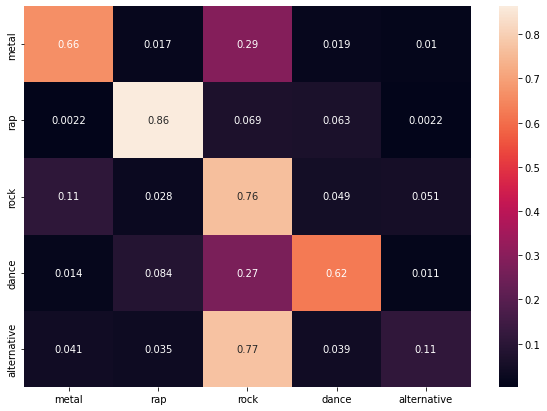

In [5]:
df_cm = pd.DataFrame(cm, index = genres_to_int.keys(), columns = genres_to_int.keys())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

plt.show()